In [ ]:
import numpy as np 
import pandas as pd 

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


In [2]:
data=pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')

In [3]:
data.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
data.dtypes

id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [5]:
set(data['road_type'])

{'highway', 'rural', 'urban'}

In [6]:
from sklearn.preprocessing import LabelEncoder 

In [7]:
cat_cols=['road_type','lighting','weather','time_of_day']
le=LabelEncoder()
for col in cat_cols:
    data[col]=le.fit_transform(data[col].astype(str))

In [8]:
data

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,2,2,0.06,35,0,2,False,True,0,False,True,1,0.13
1,1,2,4,0.99,35,0,0,True,False,1,True,True,0,0.35
2,2,1,4,0.63,70,1,0,False,True,2,True,False,2,0.30
3,3,0,4,0.07,35,1,2,True,True,2,False,False,1,0.21
4,4,1,1,0.58,60,0,1,False,False,1,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,0,4,0.10,70,0,1,True,True,0,False,False,2,0.32
517750,517750,1,4,0.47,35,0,2,True,True,2,False,False,1,0.26
517751,517751,2,4,0.62,25,0,1,False,False,0,False,True,0,0.19
517752,517752,0,3,0.63,25,2,0,True,False,0,True,True,3,0.51


In [9]:
bool_cols=['road_signs_present','public_road','holiday','school_season']
for col in bool_cols:
    data[col]=data[col].astype(int)

In [10]:
data

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13
1,1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35
2,2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30
3,3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21
4,4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,0,4,0.10,70,0,1,1,1,0,0,0,2,0.32
517750,517750,1,4,0.47,35,0,2,1,1,2,0,0,1,0.26
517751,517751,2,4,0.62,25,0,1,0,0,0,0,1,0,0.19
517752,517752,0,3,0.63,25,2,0,1,0,0,1,1,3,0.51


In [11]:
data.dtypes

id                          int64
road_type                   int64
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                    int64
weather                     int64
road_signs_present          int64
public_road                 int64
time_of_day                 int64
holiday                     int64
school_season               int64
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [12]:
data.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [13]:
data[data.duplicated(keep='first')]

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk


In [14]:
data

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13
1,1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35
2,2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30
3,3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21
4,4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,0,4,0.10,70,0,1,1,1,0,0,0,2,0.32
517750,517750,1,4,0.47,35,0,2,1,1,2,0,0,1,0.26
517751,517751,2,4,0.62,25,0,1,0,0,0,0,1,0,0.19
517752,517752,0,3,0.63,25,2,0,1,0,0,1,1,3,0.51


In [15]:
data.drop(columns='id',inplace=True)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

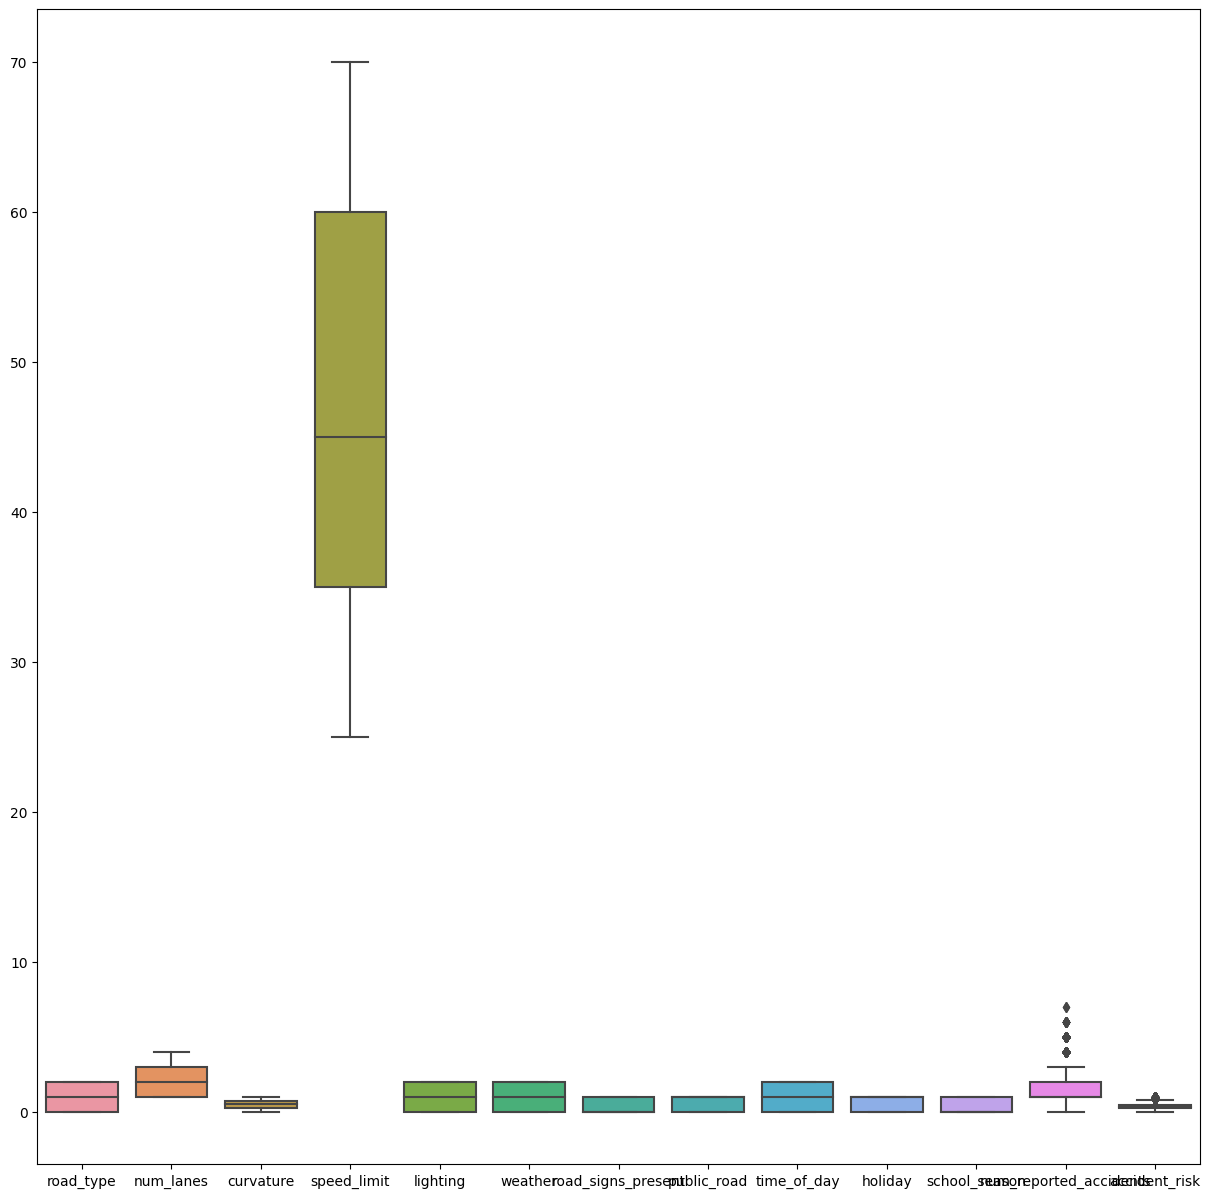

In [17]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=data,ax=ax)
plt.show()

In [18]:
data.describe()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,0.995540,2.491511,0.488719,46.112575,0.957312,0.956889,0.499204,0.502256,1.003675,0.503498,0.497514,1.187970,0.352377
std,0.816326,1.120434,0.272563,15.788521,0.801956,0.804774,0.500000,0.499995,0.816191,0.499988,0.499994,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.260000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230000
50%,1.000000,2.000000,0.510000,45.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.340000
75%,2.000000,3.000000,0.710000,60.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.460000
max,2.000000,4.000000,1.000000,70.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,7.000000,1.000000


In [19]:
X=data.drop(columns='accident_risk')
y=data['accident_risk']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [21]:
X=pd.DataFrame(X)

In [22]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05,5.177540e+05
mean,-1.432740e-17,6.060323e-17,-1.474185e-16,2.011599e-16,7.668725e-17,-5.972493e-17,-1.062203e-16,-2.766669e-17,-1.559271e-16,-4.226856e-17,-2.415346e-18,1.580954e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.219538e+00,-1.331192e+00,-1.793050e+00,-1.337212e+00,-1.193722e+00,-1.189016e+00,-9.984098e-01,-1.004522e+00,-1.229708e+00,-1.007020e+00,-9.950408e-01,-1.325918e+00
25%,-1.219538e+00,-1.331192e+00,-8.391425e-01,-7.038396e-01,-1.193722e+00,-1.189016e+00,-9.984098e-01,-1.004522e+00,-1.229708e+00,-1.007020e+00,-9.950408e-01,-2.097968e-01
50%,5.463074e-03,-4.386798e-01,7.807664e-02,-7.046739e-02,5.323017e-02,5.356937e-02,-9.984098e-01,9.954983e-01,-4.503230e-03,9.930287e-01,-9.950408e-01,-2.097968e-01
75%,1.230465e+00,4.538321e-01,8.118520e-01,8.795909e-01,1.300182e+00,1.296155e+00,1.001593e+00,9.954983e-01,1.220702e+00,9.930287e-01,1.004984e+00,9.063240e-01
max,1.230465e+00,1.346344e+00,1.875826e+00,1.512963e+00,1.300182e+00,1.296155e+00,1.001593e+00,9.954983e-01,1.220702e+00,9.930287e-01,1.004984e+00,6.486928e+00


In [23]:
corr=data.corr()

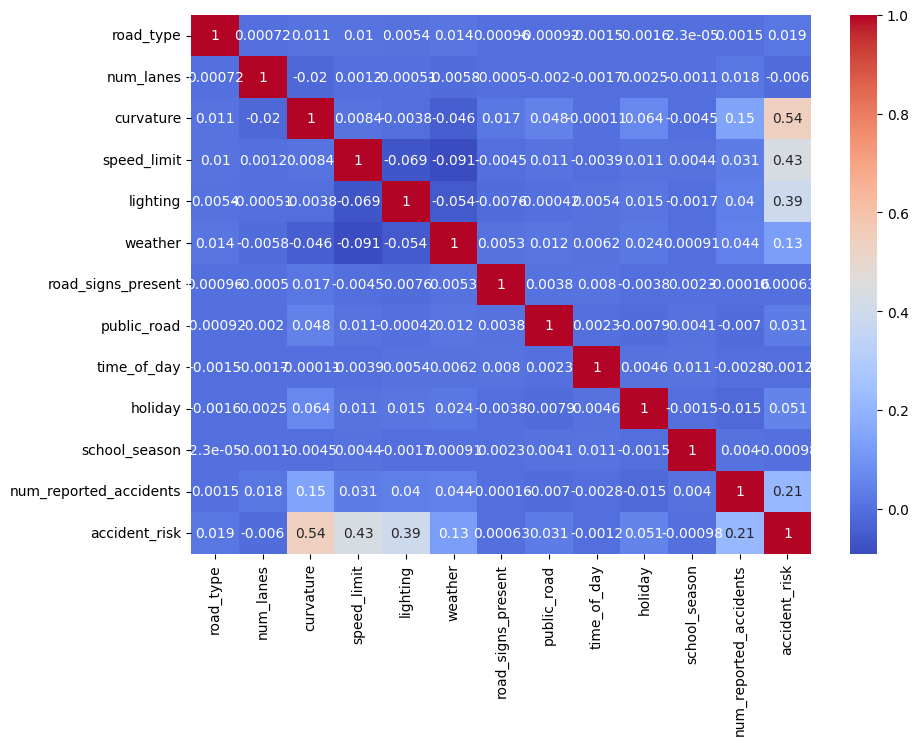

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
y_pred = rf.predict(X_test)

In [28]:
rf.score(X_test,y_test)

0.8716037264718611

In [29]:
test=pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')

In [30]:
cat_cols=['road_type','lighting','weather','time_of_day']
le=LabelEncoder()
for col in cat_cols:
    test[col]=le.fit_transform(test[col].astype(str))

In [31]:
bool_cols=['road_signs_present','public_road','holiday','school_season']
for col in bool_cols:
    test[col]=test[col].astype(int)

In [32]:
test

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,0,2,0.34,45,2,0,1,1,0,1,1,1
1,517755,2,3,0.04,45,1,1,1,0,0,1,0,0
2,517756,2,2,0.59,35,1,0,1,0,0,1,1,1
3,517757,1,4,0.95,35,0,2,0,0,0,0,0,2
4,517758,0,2,0.86,35,0,0,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,1,2,0.01,45,1,2,0,0,0,1,1,2
172581,690335,1,1,0.74,70,0,1,0,1,0,0,0,2
172582,690336,2,2,0.14,70,1,0,0,0,1,1,1,1
172583,690337,2,1,0.09,45,0,1,1,1,2,0,1,0


In [33]:
test.drop(columns='id',inplace=True)

In [34]:
test.dtypes

road_type                   int64
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                    int64
weather                     int64
road_signs_present          int64
public_road                 int64
time_of_day                 int64
holiday                     int64
school_season               int64
num_reported_accidents      int64
dtype: object

In [35]:
test=scaler.transform(test)

In [36]:
prediction=rf.predict(test)
prediction

array([0.31703333, 0.1175    , 0.1584    , ..., 0.23365   , 0.1198    ,
       0.4802    ])

In [37]:
temp= pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")
ids = temp["id"]

sub= pd.DataFrame({'id':ids,'accident_risk':prediction})
sub

,id,accident_risk
0,517754,0.317033
1,517755,0.117500
2,517756,0.158400
3,517757,0.311600
4,517758,0.418700
...,...,...
172580,690334,0.099300
172581,690335,0.432900
172582,690336,0.233650
172583,690337,0.119800


In [38]:
sub.to_csv("submission.csv",index=False)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.0461722880204292
MSE: 0.003536743173133468
R2 Score: 0.8716037264718611


In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # use all CPU cores
    scoring='r2',       # since this is regression
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))